# The Conversations Gone Awry - CMV with ConvoKit

This tutorial will demonstrate some basic ways to use the summaries data in the conversations-gone-awry-cmv corpus.

In [2]:
from convokit import Corpus, download, FightingWords

In [3]:
# OPTION 1: DOWNLOAD CORPUS 
# UNCOMMENT THESE LINES TO DOWNLOAD CORPUS
# DATA_DIR = '<YOUR DIRECTORY>'
# ROOT_DIR = download('conversations-gone-awry-cmv-corpus', data_dir=DATA_DIR)

# OPTION 2: READ PREVIOUSLY-DOWNLOADED CORPUS FROM DISK
# UNCOMMENT THIS LINE AND REPLACE WITH THE DIRECTORY WHERE THE CORPUS IS LOCATED
# ROOT_DIR = '<YOUR DIRECTORY>'


# corpus = Corpus(ROOT_DIR)
corpus = Corpus(download('conversations-gone-awry-cmv-corpus', data_dir="/reef/kz88/scd_test"))

Dataset already exists at /reef/kz88/scd_test/conversations-gone-awry-cmv-corpus


## Getting Summarized Conversation ids:

To compare human vs. machine summaries, let's first get the ids of conversations that were summarized by human or computer.

In [4]:
human_summary_ids = corpus.get_conversation_ids(selector=lambda conversation: conversation.meta["summary_meta"] != []
and any(summary_meta["summary_type"] == "human_written_SCD" for summary_meta in conversation.meta["summary_meta"]))
#conversation.meta["summary_meta"]["summary_type"] == "human_scd")
machine_summary_ids = corpus.get_conversation_ids(selector=lambda conversation: conversation.meta["summary_meta"] != []
               and any(summary_meta["summary_type"] == "machine_generated_SCD" for summary_meta in conversation.meta["summary_meta"]))
print(f"These are the human summary ids N={len(human_summary_ids)}: {human_summary_ids}")
print("\n")
print(f"These are the machine summary ids N={len(machine_summary_ids)}: {machine_summary_ids}")

These are the human summary ids: ['cvfwip4', 'cvfy5sk', 'cvfs3mf', 'cvfvv3l', 'cvtyn5z', 'cvtys2s', 'cvw7si5', 'cvw8duz', 'cvycdhd', 'cvyc6bd', 'cw984zs', 'cw9c7m3', 'cwb7lth', 'cwb77ig', 'cwh6p1t', 'cwh7b8s', 'cwlcjw7', 'cwlcgnn', 'cxcj87x', 'cxcjfcu', 'cy1839o', 'cy18kl8', 'cynfrcu', 'cynfxwx', 'cyx5fb3', 'cyx5wnn', 'cyx58tx', 'cyx597p', 'cz2qbo8', 'cz2r8ig', 'czfemy9', 'czfloab', 'cziuu8t', 'czj77j0', 'czks0my', 'czksn6f', 'czl0nxo', 'czl0cts', 'czwe3sk', 'czwfzp6', 'czwbq19', 'czwcw2e', 'd01proz', 'd01qx3x', 'd04s995', 'd04vgqt', 'd09qqbu', 'd09qloj', 'd0qcfoo', 'd0qcmf0']


These are the machine summary ids: ['cvfwip4', 'cvfy5sk', 'cvfs3mf', 'cvfvv3l', 'cvtyn5z', 'cvtys2s', 'cvw7si5', 'cvw8duz', 'cvycdhd', 'cvyc6bd', 'cw984zs', 'cw9c7m3', 'cwb7lth', 'cwb77ig', 'cwh6p1t', 'cwh7b8s', 'cwlcjw7', 'cwlcgnn', 'cxcj87x', 'cxcjfcu', 'cxx5b28', 'cxx4vnu', 'cy1839o', 'cy18kl8', 'cy2y2sg', 'cy2wicd', 'cynfrcu', 'cynfxwx', 'cyx5fb3', 'cyx5wnn', 'cyx58tx', 'cyx597p', 'cz2qbo8', 'cz2pcn2', 'cz2

List of human summary word counts

In [5]:
human_word_counts = []
for convoid in human_summary_ids:
    summary_meta = corpus.get_conversation(convoid).retrieve_meta("summary_meta")
    for summary in summary_meta:
        if summary["summary_type"] == "human_written_SCD":
            human_text = summary["summary_text"]
    human_word_counts.append(len(human_text.split()))
human_word_counts.sort()

Statistics for human summaries

In [6]:
num_summaries = len(human_word_counts)
middle = num_summaries // 2
if num_summaries % 2 == 0:
    median_word_count = (human_word_counts[middle - 1] + human_word_counts[middle]) / 2
else:
    median_word_count = human_word_counts[middle]

print(f"The median word count of the human summaries is: {median_word_count}")

mean_word_count = sum(human_word_counts)/num_summaries

print(f"The mean word count of the human summaries is: {mean_word_count}")

variance = sum((x - mean_word_count) ** 2 for x in human_word_counts) / len(human_word_counts)

stdev = variance ** 0.5

print(f"The variance of the word count of the human summaries is: {variance}")

print(f"The standard deviation of the word count of the human summaries is: {stdev}")

The median word count of the human summaries is: 60.5
The mean word count of the human summaries is: 60.74
The variance of the word count of the human summaries is: 89.19239999999999
The standard deviation of the word count of the human summaries is: 9.444172806551137


List of machine summary word counts

In [7]:
machine_word_counts = []
for convoid in machine_summary_ids:
    summary_meta = corpus.get_conversation(convoid).retrieve_meta("summary_meta")
    for summary in summary_meta:
        if summary["summary_type"] == "machine_generated_SCD":
            machine_text = summary["summary_text"]
    machine_word_counts.append(len(machine_text.split()))
machine_word_counts.sort()

Statistics for machine summaries

In [8]:
num_summaries = len(machine_word_counts)
middle = num_summaries // 2
if num_summaries % 2 == 0:
    median_word_count = (machine_word_counts[middle - 1] + machine_word_counts[middle]) / 2
else:
    median_word_count = machine_word_counts[middle]

print(f"The median word count of the human summaries is: {median_word_count}")

mean_word_count = sum(machine_word_counts)/num_summaries

print(f"The mean word count of the human summaries is: {mean_word_count}")

variance = sum((x - mean_word_count) ** 2 for x in machine_word_counts) / len(machine_word_counts)

stdev = variance ** 0.5

print(f"The variance of the word count of the human summaries is: {variance}")

print(f"The standard deviation of the word count of the human summaries is: {stdev}")

The median word count of the human summaries is: 73.0
The mean word count of the human summaries is: 73.5184331797235
The variance of the word count of the human summaries is: 108.20357726857655
The standard deviation of the word count of the human summaries is: 10.402094850008654


## Analyze Summary Differences with FightingWords

Initializing fighting words using text func to only look at summary text in metadata.

In [9]:
def extract_summary_text(conversation):
    summaries = [summary['summary_text'] for summary in conversation.meta['summary_meta']]
    return ' '.join(summaries)

fw_human = FightingWords(ngram_range=(1,2), obj_type = "conversation", text_func= lambda conversation: extract_summary_text(conversation))

Initializing default CountVectorizer with ngram_range (1, 2)... Done.


Fitting FightingWords on human summaries, using lambdas to find human summaries.

In [10]:
fw_human.fit(corpus, class1_func=lambda conversation: conversation.meta["has_removed_comment"] == True,
               class2_func=lambda conversation: conversation.meta["has_removed_comment"] == False,
               selector=lambda conversation: conversation.meta["summary_meta"] != {}
               and any(summary['summary_type'] == 'human_written_SCD' for summary in conversation.meta['summary_meta']))

class1_func returned 25 valid corpus components. class2_func returned 25 valid corpus components.
Vocab size is 101
Comparing language...
ngram zscores computed.


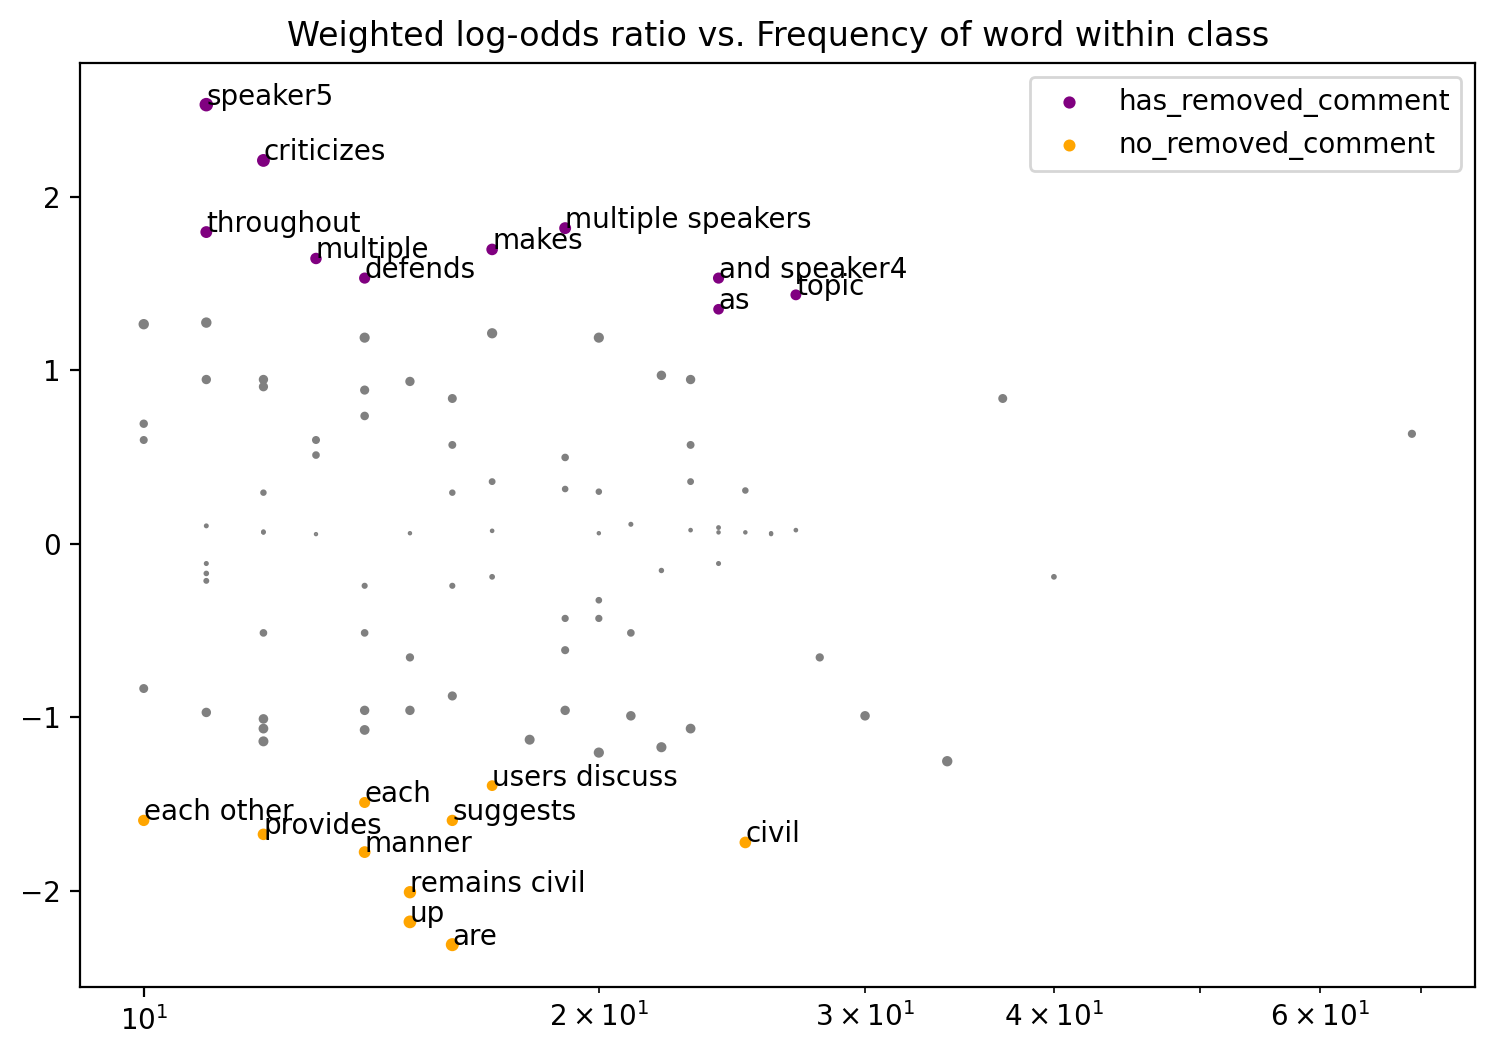

In [11]:
df_human = fw_human.summarize(corpus, plot=True, class1_name='has_removed_comment', class2_name='no_removed_comment')

Display the dataframe of ngram z-scores for the human summaries

In [12]:
df_human

,z-score,class
ngram,,
are,-2.310504,no_removed_comment
up,-2.179200,no_removed_comment
remains civil,-2.008224,no_removed_comment
manner,-1.777028,no_removed_comment
civil,-1.721376,no_removed_comment
...,...,...
makes,1.696745,has_removed_comment
throughout,1.796782,has_removed_comment
multiple speakers,1.819473,has_removed_comment


Fitting FightingWords on machine summaries, using lambdas to find machine summaries.

In [13]:
fw_machine = FightingWords(ngram_range=(1,2), obj_type = "conversation", text_func= lambda conversation: extract_summary_text(conversation))

Initializing default CountVectorizer with ngram_range (1, 2)... Done.


In [14]:
fw_machine.fit(corpus, class1_func=lambda conversation: conversation.meta["has_removed_comment"] == True,
               class2_func=lambda conversation: conversation.meta["has_removed_comment"] == False,
               selector=lambda conversation: conversation.meta["summary_meta"] != {}
               and any(summary['summary_type'] == 'machine_generated_SCD' for summary in conversation.meta['summary_meta']))

class1_func returned 217 valid corpus components. class2_func returned 217 valid corpus components.
Vocab size is 777
Comparing language...
ngram zscores computed.


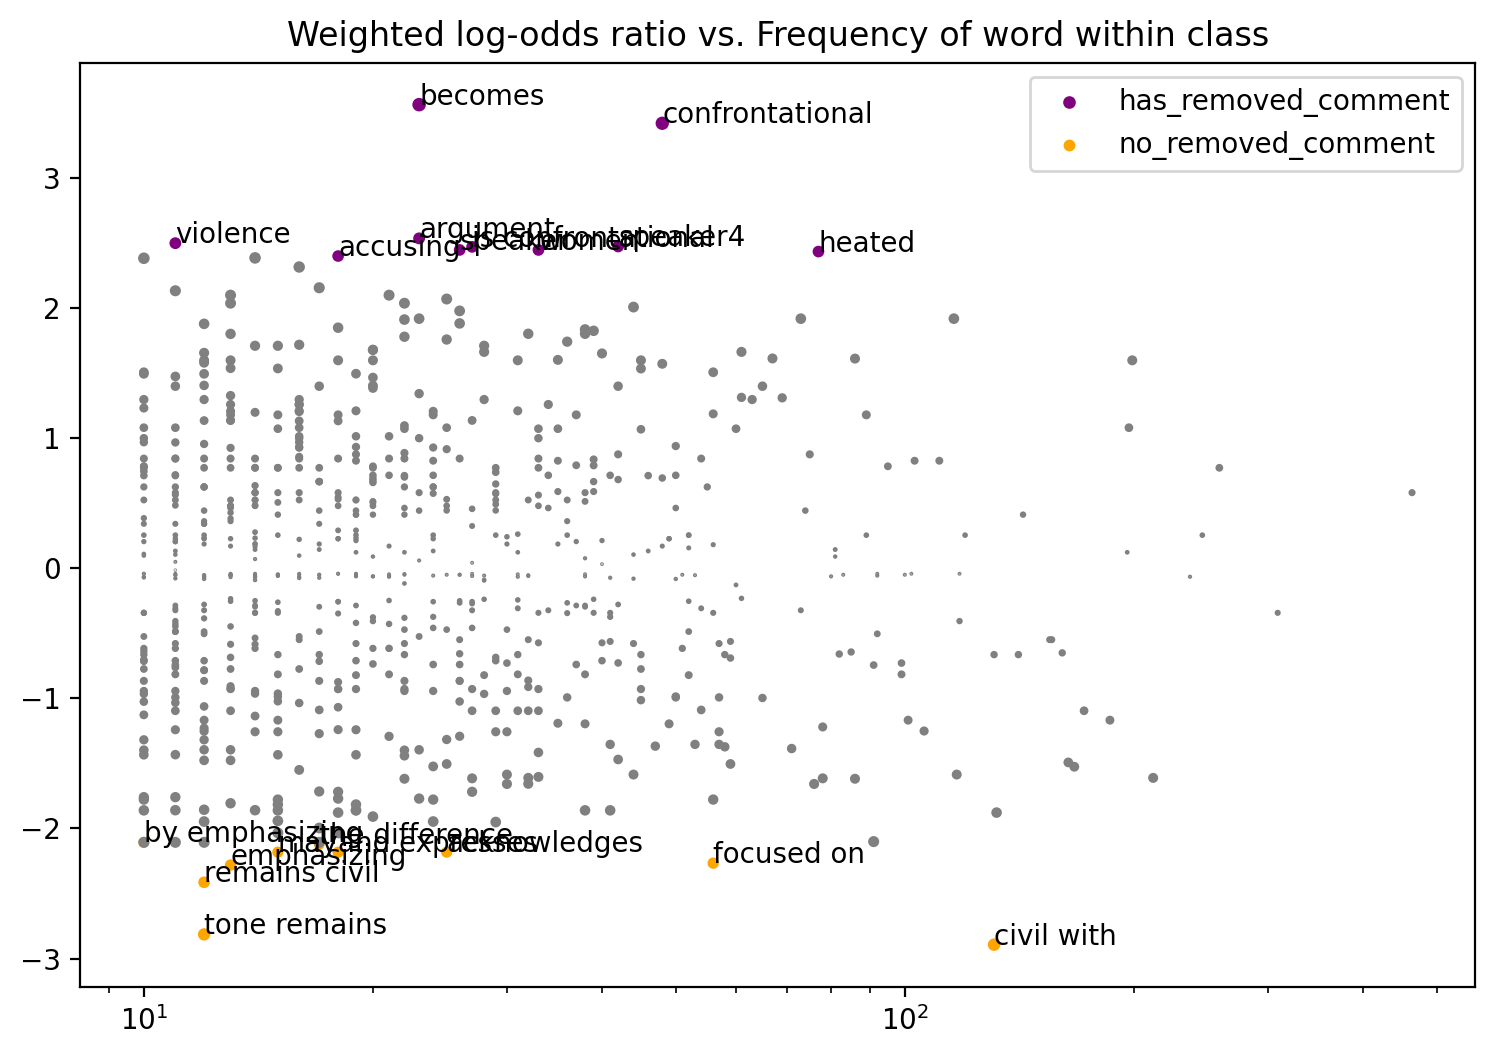

In [15]:
df_machine = fw_machine.summarize(corpus, plot=True, class1_name='has_removed_comment', class2_name='no_removed_comment')

Display the dataframe of ngram z-scores for the machine summaries

In [16]:
df_machine

,z-score,class
ngram,,
civil with,-2.893388,no_removed_comment
tone remains,-2.814465,no_removed_comment
remains civil,-2.413841,no_removed_comment
emphasizing,-2.281580,no_removed_comment
focused on,-2.266913,no_removed_comment
...,...,...
speaker4,2.472496,has_removed_comment
violence,2.497884,has_removed_comment
argument,2.534786,has_removed_comment


Using lambdas and text_func to select the summary text, we can use fighting words to compare the machine-generated and human summaries on a weighted-log odds ration to frequency graph.

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 50 valid corpus components. class2_func returned 434 valid corpus components.
Vocab size is 1123
Comparing language...
ngram zscores computed.


/reef/kz88/kz88_env/lib/python3.11/site-packages/convokit/fighting_words/fightingWords.py:221: UserWarning: There are components that appear in both classes. Note that FightingWords is typically used to compare two disjoint sets of texts.
  warnings.warn(


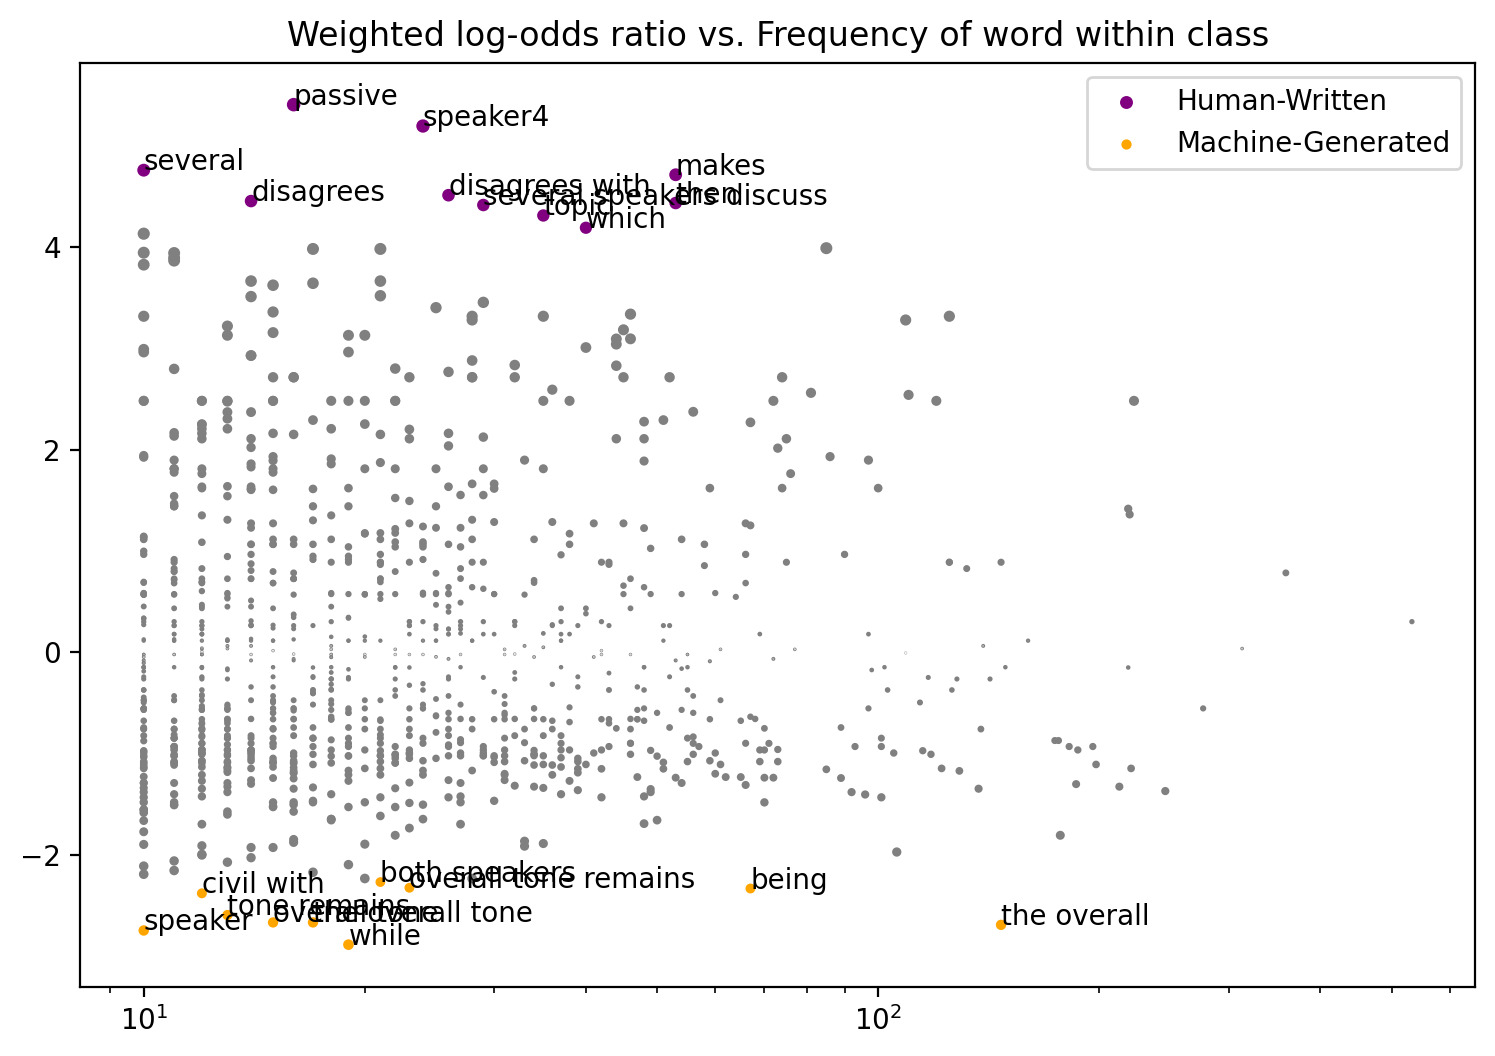

                   z-score              class
ngram                                        
while            -2.885797  Machine-Generated
speaker          -2.745848  Machine-Generated
the overall      -2.690270  Machine-Generated
the overall tone -2.666269  Machine-Generated
overall tone     -2.666269  Machine-Generated
...                    ...                ...
disagrees with    4.515636      Human-Written
makes             4.717537      Human-Written
several           4.762688      Human-Written
speaker4          5.198891      Human-Written
passive           5.409831      Human-Written

[1123 rows x 2 columns]


In [17]:
def extract_summary_text(conversation):
    summaries = [summary['summary_text'] for summary in conversation.meta['summary_meta']]
    return ' '.join(summaries)

fw_analyzer = FightingWords(
    obj_type='conversation',
    text_func= lambda conversation: extract_summary_text(conversation),
    cv=None,
    ngram_range=(1, 3),
    prior=0.1
)


class1_func = lambda conversation: any(summary['summary_type'] == 'human_written_SCD' for summary in conversation.meta['summary_meta'])
class2_func = lambda conversation: any(summary['summary_type'] == 'machine_generated_SCD' for summary in conversation.meta['summary_meta'])
selector = lambda conversation: 'summary_meta' in conversation.meta and len(conversation.meta['summary_meta']) > 0

fw_analyzer.fit(
    corpus=corpus,
    class1_func=class1_func,
    class2_func=class2_func,
    selector=selector
)

df_human_summaries = fw_analyzer.summarize(corpus, plot=True, class1_name='Human-Written', class2_name='Machine-Generated')
print(df_human_summaries)

